# Optional Lab: Model Representation

<figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:600px;height:200px;">
</figure>

## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

Objetivos
En este laboratorio podrás:
- Aprender a implementar el modelo $f_{w,b}$ para la regresión lineal con una variable

## Notación
A continuación, un resumen de algunas de las notaciones que encontrará. 

| General       Notation  | Description Python (if applicable)         |  Python (if applicable) |
| ------------------------| ------------------------------------------ | ----------------------- |
| $a$                     | scalar, non bold                           | |
| $\mathbf{a}$            | vector, bold                               | |
| **Regression**          |                                            | |
|  $\mathbf{x}$ | Ejemplo de entrenamiento  ( aca tamaños (1000 pies^2))  | `x_train` |  
|  $\mathbf{y}$  | Ejemplo de Objetivos  (aca precios (1000s de dolares)).  | `y_train` |
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Exemplo  | `x_i`, `y_i`|
| m | Numeros de exemplos  ed entrenamiento | `m`|
|  $w$  |  parametro: weight, (pesos)                                 | `w`    |
|  $b$           |  parametro: bias  (sesgo)                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | El resultado de la evaluación del modelo en $x^{(i)}$ parametrizado con $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 

## Herramientas
En este laboratorio harás uso de 
- NumPy, una biblioteca popular para la computación científica
- Matplotlib, una biblioteca popular para trazar datos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Problem Statement
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " /> 

Al igual que en la clase, utilizará el ejemplo motivador de la predicción del precio de la vivienda. Este laboratorio utilizará un conjunto de datos sencillo con sólo dos puntos de datos: una casa de 1.000 pies cuadrados vendida por 300.000 dólares y una casa de 2.000 pies cuadrados vendida por 500.000 dólares. Estos dos puntos constituirán nuestro *conjunto de datos o de entrenamiento*. En este laboratorio, las unidades de tamaño son 1000 pies cuadrados y las unidades de precio son 1000 dólares.
| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

Le gustaría ajustar un modelo de regresión lineal (que se muestra arriba como la línea recta azul) a través de estos dos puntos, de modo que pueda predecir el precio de otras casas, por ejemplo, una casa de 1200 pies cuadrados.


Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [3]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Note**: The course will frequently utilize the python 'f-string' output formatting described [here](https://docs.python.org/3/tutorial/inputoutput.html) when printing. The content between the curly braces is evaluated when producing the output.

>**Nota**: El curso utilizará frecuentemente el formato de salida 'f-string' de python descrito [aquí](https://docs.python.org/3/tutorial/inputoutput.html) al imprimir. El contenido entre las llaves se evalúa al producir la salida.

### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

Se utilizará `m` para denotar el número de ejemplos de entrenamiento. Los arrays Numpy tienen un parámetro `.shape`. El parámetro `x_train.shape` devuelve una tupla python con una entrada para cada dimensión. `x_train.shape[0]` es la longitud del array y el número de ejemplos como se muestra a continuación.

In [4]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


One can also use the Python `len()` function as shown below.

También se puede utilizar la función `len()` de Python como se muestra a continuación.

In [5]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

You will use ($x^{(i)}$ , $y^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, ($x^{(0)}$, $y^{(0)}$) is (1.0, 300.0) and ($x^{(1)}$, $y^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

Se utilizará ($x^{(i)}$ , $y^{(i)}$) para denotar el $i^{th}$ ejemplo de entrenamiento. Dado que Python tiene índice cero, ($x^{(0)}$, $y^{(0)}$) es (1,0, 300,0) y ($x^{(1)}$, $y^{(1)}$) es (2,0, 500,0). 

Para acceder a un valor en una matriz Numpy, uno indexa la matriz con el desplazamiento deseado. Por ejemplo, la sintaxis para acceder a la ubicación cero de `x_train` es `x_train[0]`.
Ejecute el siguiente bloque de código para obtener el ejemplo de entrenamiento $i^{th}$.

In [6]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

Puede trazar estos dos puntos utilizando la función `scatter()` de la biblioteca `matplotlib`, como se muestra en la celda de abajo. 
- Los argumentos de la función `marker` y `c` muestran los puntos como cruces rojas (por defecto son puntos azules).

Puede utilizar otras funciones de la biblioteca `matplotlib` para establecer el título y las etiquetas que se mostrarán

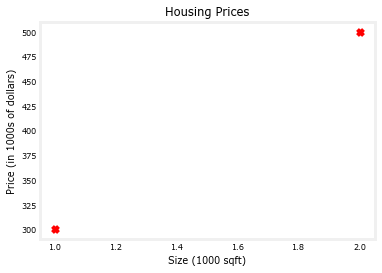

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Model function

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > Como se describe en la lectura, el modelo de regresión linear es representada con las siguiente funcion.

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

La fórmula anterior es la forma en que se pueden representar las líneas rectas - diferentes valores de $w$ y $b$ dan diferentes líneas rectas en el gráfico. <br/> <br/> <br/> <br/> <br/> 

Intentemos intuirlo mejor a través de los bloques de código siguientes. Empecemos con $w = 100$ y $b = 100$. 

**Nota: Puedes volver a esta celda para ajustar los parámetros w y b del modelo**

In [8]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   

Ahora, vamos a calcular el valor de $f_{w,b}(x^{(i)})$ para sus dos puntos de datos. Usted puede escribir explícitamente esto para cada punto de datos como 

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para un gran número de puntos de datos, esto puede ser difícil de manejar y repetitivo. Así que en su lugar, puede calcular la salida de la función en un bucle `for` como se muestra en la función `compute_model_output` a continuación.
> **Nota**: La descripción del argumento `(ndarray (m,))` describe un array n-dimensional de Numpy de forma (m,). El argumento `(scalar)` describe un argumento sin dimensiones, sólo una magnitud.  
> **Nota**: `np.zero(n)` devolverá un array numpy unidimensional con $n$ entradas   


In [9]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m    = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

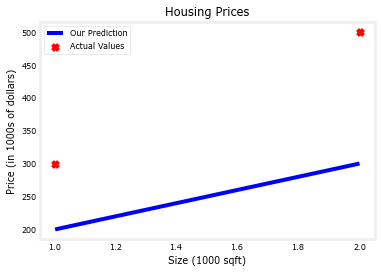

In [10]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

#### Tip:
You can use your mouse to click on the triangle to the left of the green "Hints" below to reveal some hints for choosing b and w.

Como puedes ver, al establecer $w = 100$ y $b = 100$ no se obtiene una línea que se ajuste a nuestros datos. 

### Desafío
Prueba a experimentar con diferentes valores de $w$ y $b$. ¿Cuáles deberían ser los valores para obtener una recta que se ajuste a nuestros datos?

#### Consejo:
Puedes usar tu ratón para hacer clic en el triángulo a la izquierda de las "Pistas" verdes de abajo para revelar algunas pistas para elegir b y w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [11]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.